In [1]:
from keras.datasets import fashion_mnist
import numpy as np
train, test = fashion_mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.0
X_test = X_test/255.0

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
from keras.layers import Conv2D, MaxPool2D,GlobalAveragePooling2D,Dense,Input, Reshape, UpSampling2D,BatchNormalization, GaussianNoise
from keras.models import Model
from keras.optimizers import Adam, RMSprop, SGD
act_func = 'selu'
aec_dim_num = 2 # liczba wymiarów zakodowanych cech
encoder_layers = [
  GaussianNoise(1),
  BatchNormalization(),
  Conv2D(32, (7,7),padding = 'same',activation=act_func),
  MaxPool2D(2,2),
  BatchNormalization(),
  Conv2D(64, (5,5),padding = 'same',activation=act_func),
  MaxPool2D(2,2),
  BatchNormalization(),
  Conv2D(128, (3,3),padding = 'same',activation=act_func),
  GlobalAveragePooling2D(),
  Dense(aec_dim_num, activation = 'tanh')] #struktura enkodera
decoder_layers = [
    Dense(128, activation = act_func),
  BatchNormalization(),
  Reshape((1,1,128)),
  UpSampling2D((7,7)),
  Conv2D(32, (3,3), padding = 'same',activation=act_func),
  BatchNormalization(),
  UpSampling2D((2,2)),
  Conv2D(32, (5,5),padding = 'same',activation=act_func),
  BatchNormalization(),
  UpSampling2D((2,2)),
  Conv2D(32, (7,7),padding = 'same',activation=act_func),
  BatchNormalization(),
  Conv2D(1, (3,3),padding = 'same',activation='sigmoid')] # struktura dekodera
lrng_rate = 0.0002 # współczynnik uczenia
tensor = input_aec = input_encoder = Input(X_train.shape[1:])
for layer in encoder_layers:
  tensor = layer(tensor)
output_encoder = tensor
dec_tensor = input_decoder =Input(output_encoder.shape[1:])
for layer in decoder_layers:
  tensor = layer(tensor)
  dec_tensor = layer(dec_tensor)
output_aec = tensor
output_decoder = dec_tensor
autoencoder = Model(inputs = input_aec,outputs = output_aec)
encoder = Model(inputs = input_encoder,outputs = output_encoder)
decoder = Model(inputs = input_decoder,outputs = dec_tensor)
autoencoder.compile(optimizer=Adam(lrng_rate),loss='binary_crossentropy')
autoencoder.fit(x = X_train, y = X_train,epochs = 200)

Epoch 1/200
1875/1875 [==============================] - 25s 7ms/step - loss: 0.4075
Epoch 2/200
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3719
Epoch 3/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3673
Epoch 4/200
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3639
Epoch 5/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3618
Epoch 6/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3604
Epoch 7/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3593
Epoch 8/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3582
Epoch 9/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3573
Epoch 10/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3563
Epoch 11/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3559
Epoch 12/200
1875/1875 [==============================] - 13s 7

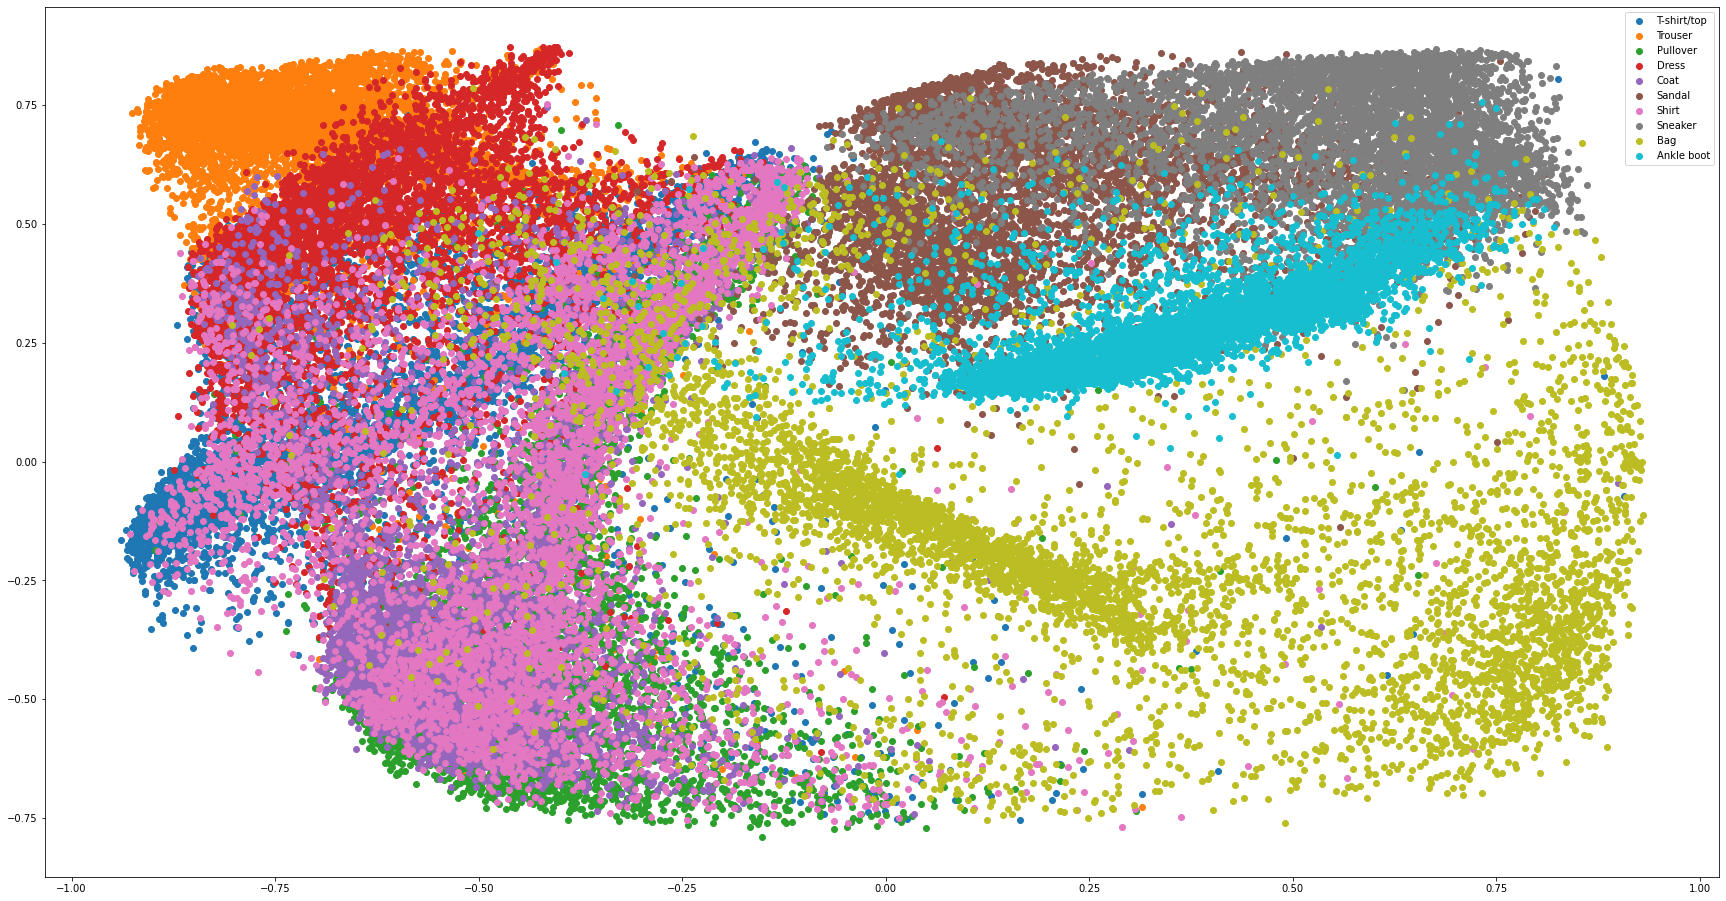

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (30,16))
for i in range(10):
  digits = y_train == i
  needed_imgs = X_train[digits,...]
  preds = encoder.predict(needed_imgs, verbose=0)
  ax.scatter(preds[:,0], preds[:,1])
ax.legend(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

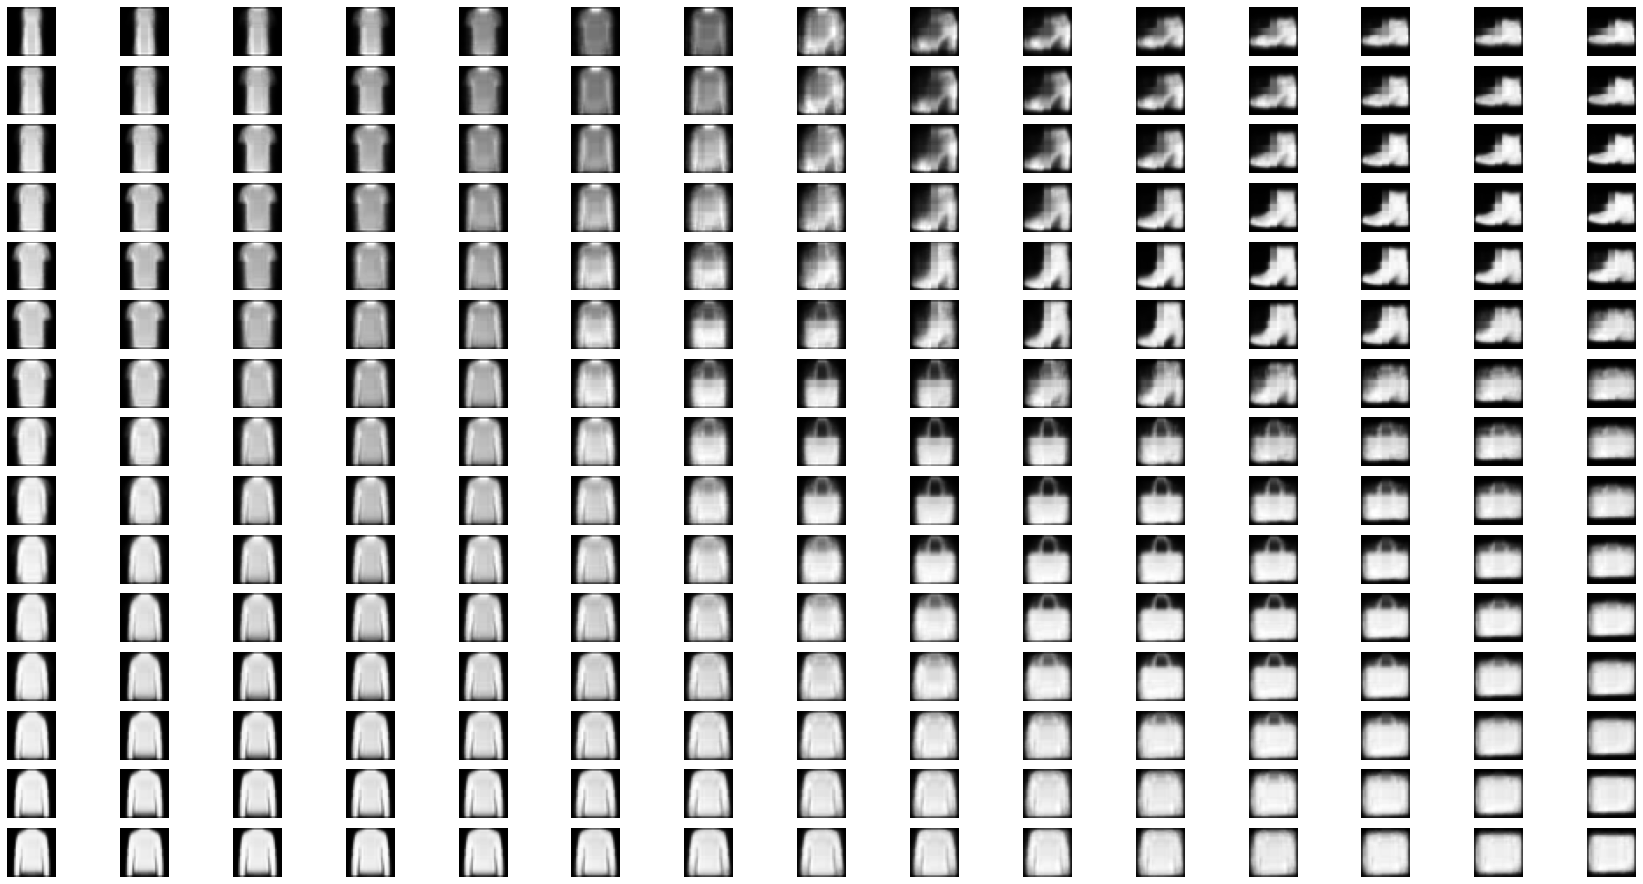

In [4]:
num = 15
limit = 0.6
step = limit*2/num
fig, ax = plt.subplots(num, num, figsize = (30,16))
X_vals = np.arange(-limit, limit, step)
Y_vals = np.arange(-limit, limit, step)
for i, x in enumerate(X_vals):
  for j, y in enumerate(Y_vals):
    test_in = np.array([[x,y]])
    output = decoder.predict(x=test_in, verbose=0)
    output = np.squeeze(output)
    ax[-j-1,i].imshow(output, cmap = 'gray')
    ax[-j-1,i].axis('off')

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = np.expand_dims(X_train, axis=-1)
X_train = (X_train/255)
X_test = np.expand_dims(X_test, axis=-1)
X_test = (X_test/255)

In [12]:
from keras.layers import Conv2D, MaxPool2D,Input, UpSampling2D, GaussianNoise
from keras.models import Model
from keras.optimizers import Adam
act_func = 'selu'
encoder_layers = [GaussianNoise(1),
  Conv2D(32, (3,3),padding = 'same',activation=act_func),
  MaxPool2D(2,2),
  Conv2D(64, (3,3),padding = 'same',activation=act_func),
  MaxPool2D(2,2),
  Conv2D(128, (3,3),padding = 'same',activation=act_func) ]
decoder_layers = [
  UpSampling2D((2,2)),
  Conv2D(32, (3,3), padding = 'same',activation=act_func),
  UpSampling2D((2,2)),
  Conv2D(32, (3,3),padding = 'same',activation=act_func),
  Conv2D(1, (3,3),padding = 'same',activation='sigmoid')]

In [13]:
lrng_rate = 0.0001
tensor = autoencoder_input = Input(X_train.shape[1:])
for layer in encoder_layers+decoder_layers:
  tensor = layer(tensor)
autoencoder = Model(inputs = autoencoder_input,outputs = tensor)
autoencoder.compile(optimizer=Adam(lrng_rate),loss='binary_crossentropy')
autoencoder.fit(x = X_train, y = X_train,epochs = 50, batch_size = 256)

Epoch 1/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3911
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3585
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3530
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3494
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3464
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3439
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3418
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3399
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3389
Epoch 10/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3377
Epoch 11/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3369
Epoch 12/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3360
Epoch 13/50
2

In [14]:
test_photos = X_test[10:20,...].copy()
mask = np.random.randn(*test_photos.shape)
white = mask > 1
black = mask < -1
noisy_test_photos=test_photos.copy()
noisy_test_photos[white] = 1
noisy_test_photos[black] = 0
#noisy_test_photos /= 255.0


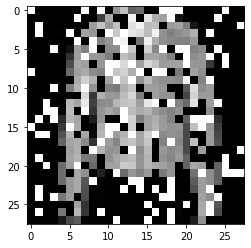

In [15]:
plt.imshow(noisy_test_photos[0].squeeze(), cmap='gray')

1/1 [==============================] - 0s 73ms/step


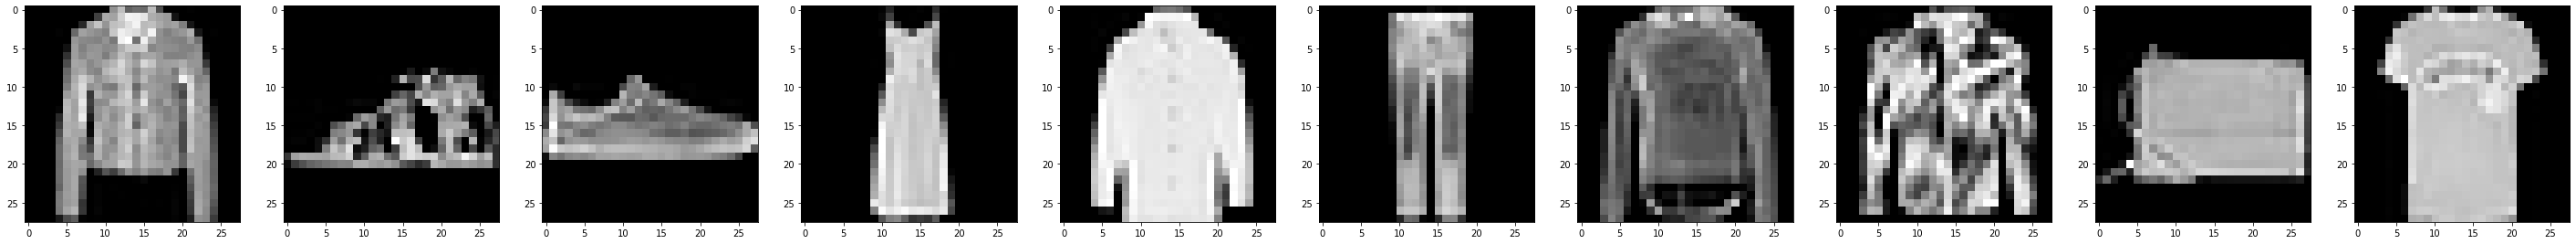

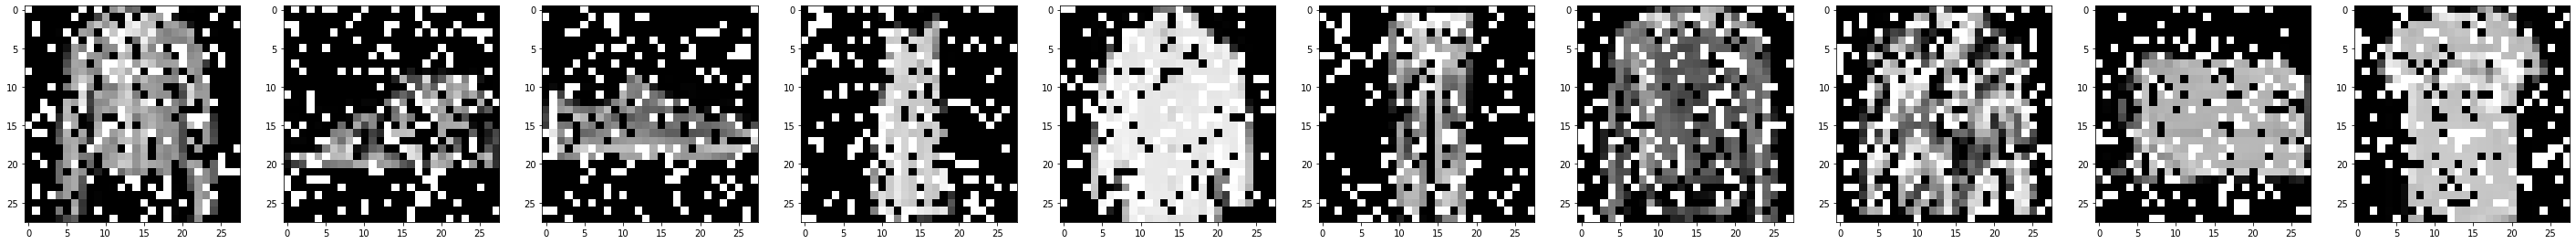

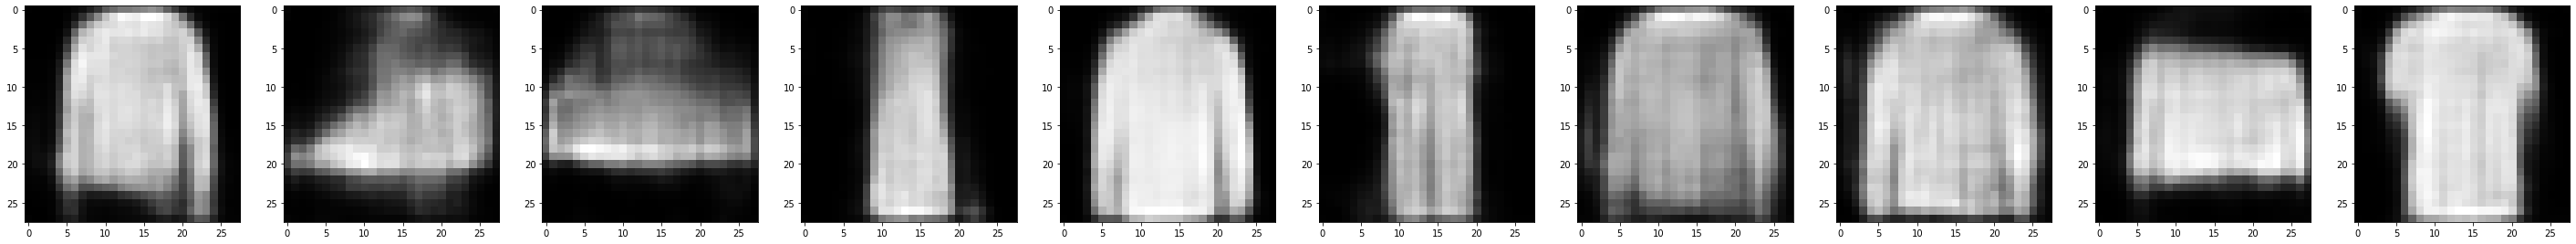

In [16]:
def show_pictures(arrs):
  arr_cnt = arrs.shape[0]
  fig, axes = plt.subplots(1, arr_cnt,figsize=(5*arr_cnt, arr_cnt))
  for axis, pic in zip(axes, arrs):
    axis.imshow(pic.squeeze(), cmap = 'gray')
#cleaned_images = autoencoder.predict(noisy_test_photos/255)*255
cleaned_images=autoencoder.predict(noisy_test_photos)
show_pictures(test_photos)
show_pictures(noisy_test_photos)
show_pictures(cleaned_images)